In [12]:
import os

file_path = r'C:\Users\TanMeh\Desktop\jupyter\to code - Copy - 2.xlsx'

if os.path.exists(file_path):
    data = pd.read_excel(file_path, sheet_name='Sheet1')
    print("File loaded successfully!")
else:
    print(f"File not found at: {file_path}")


File loaded successfully!


In [13]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\TanMeh\Desktop\jupyter\to code - Copy - 2.xlsx' 
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows and column names
print("First few rows of the dataset:")
print(data.head())

print("\nColumn names in the dataset:")
print(data.columns)


First few rows of the dataset:
   P_SEXE  P_GRAGE  D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR  D_HREDE
0       1       14      291500     5045500       291500      5045500      930
1       1       14      291500     5045500       291500      5045500     1030
2       1       14      291500     5045500       292500      5045500     1200
3       1       14      292500     5045500       291500      5045500     1300
4       1       14      291500     5045500       291500      5045500     1400

Column names in the dataset:
Index(['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR',
       'D_DESTYCOOR', 'D_HREDE'],
      dtype='object')


In [14]:
data.columns.difference([ 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR','D_DESTYCOOR',])

Index(['D_HREDE', 'P_GRAGE', 'P_SEXE'], dtype='object')

In [15]:
# Cell 1: Prepare Data for P_SEXE, P_GRAGE, and D_ORIXCOOR

# Select relevant columns
subset = data[['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR']].copy()  # Create a copy to avoid warnings

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data , columns = data.columns)
# Add noise to the data for augmentation
coordination_cols = [ 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR','D_DESTYCOOR',]
other_cols =  data.columns.difference([ 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR','D_DESTYCOOR',])

noise_factor = 0.01
noisy_data = scaled_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=scaled_data.shape)


# Clip values to ensure they stay within [0, 1]
noisy_data = np.clip(noisy_data, 0, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(noisy_data, scaled_data, test_size=0.2, random_state=42)

print("Data prepared for P_SEXE, P_GRAGE, and D_ORIXCOOR.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

Data prepared for P_SEXE, P_GRAGE, and D_ORIXCOOR.
X_train shape: (9740, 7), y_train shape: (9740, 7)


In [16]:
data_scaled

,P_SEXE,P_GRAGE,D_ORIXCOOR,D_ORIYCOOR,D_DESTXCOOR,D_DESTYCOOR,D_HREDE
0,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.329749
1,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.365591
2,0.0,0.857143,0.485000,0.983239,0.486667,0.983239,0.426523
3,0.0,0.857143,0.486667,0.983239,0.485000,0.983239,0.462366
4,0.0,0.857143,0.485000,0.983239,0.485000,0.983239,0.498208
...,...,...,...,...,...,...,...
12170,0.0,0.214286,0.496667,0.982654,0.486667,0.983629,0.964158
12171,1.0,0.214286,0.490000,0.983239,0.490000,0.983434,0.462366
12172,1.0,0.214286,0.490000,0.983434,0.490000,0.983239,0.478495
12173,1.0,0.214286,0.490000,0.983239,0.498333,0.981875,0.569892


In [17]:
# Cell 2: Update Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.3),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid activation for normalized output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse' )

# Display the model summary
model.summary()


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,591 (45.28 KB)

 Trainable params: 11,591 (45.28 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Cell 3: Train the Updated Neural Network
history = model.fit(
    X_train, y_train,
    epochs=100,  # Number of training epochs
    batch_size=64,  # Batch size
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=2  # Show detailed training output
)

print("Model training complete.")


Epoch 1/100
122/122 - 2s - 14ms/step - loss: 0.0424 - val_loss: 0.0099
Epoch 2/100
122/122 - 0s - 2ms/step - loss: 0.0138 - val_loss: 0.0052
Epoch 3/100
122/122 - 0s - 3ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 4/100
122/122 - 0s - 2ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 5/100
122/122 - 0s - 2ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 6/100
122/122 - 0s - 3ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 7/100
122/122 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 8/100
122/122 - 0s - 2ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 9/100
122/122 - 0s - 2ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 10/100
122/122 - 0s - 3ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 11/100
122/122 - 0s - 2ms/step - loss: 0.0032 - val_loss: 8.1527e-04
Epoch 12/100
122/122 - 0s - 2ms/step - loss: 0.0032 - val_loss: 8.1537e-04
Epoch 13/100
122/122 - 0s - 2ms/step - loss: 0.0029 - val_loss: 7.4851e-04
Epoch 14/100
122/122 - 0s - 3ms/step - loss: 0.0028 - val_loss: 7.2583e-0

In [19]:
# Use the trained model to predict synthetic outputs from test inputs
synthetic_output = model.predict(X_test)
synthetic_output

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[6.6213190e-08, 2.7894369e-01, 4.8239961e-01, ..., 4.8757556e-01,
        9.9999899e-01, 2.5026593e-01],
       [5.6802167e-04, 6.1909878e-01, 4.8784301e-01, ..., 4.8596081e-01,
        9.9670202e-01, 6.2649214e-01],
       [4.5405829e-04, 7.7877212e-01, 4.8829576e-01, ..., 4.8651278e-01,
        9.9742991e-01, 5.9563065e-01],
       ...,
       [6.0739997e-04, 6.4441133e-01, 4.8789421e-01, ..., 4.8605683e-01,
        9.9653769e-01, 6.2158227e-01],
       [1.0000000e+00, 9.9176604e-01, 4.8329985e-01, ..., 4.9242243e-01,
        9.9999911e-01, 3.6157605e-01],
       [1.0000000e+00, 4.4257870e-01, 4.8377740e-01, ..., 4.8392427e-01,
        9.9989545e-01, 3.1684783e-01]], dtype=float32)

In [20]:
# Cell 4: Generate Synthetic Data
# Use the trained model to predict synthetic outputs from test inputs
synthetic_output = model.predict(X_test)

# Combine the synthetic data into a DataFrame
synthetic_data = pd.DataFrame(synthetic_output, columns=data.columns)

# Post-process synthetic data
synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].apply(
    lambda x: 1 if x < 0.5 else 2  # Ensure P_SEXE is 1 or 2
)
synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].round().clip(
    data['P_GRAGE'].min(), data['P_GRAGE'].max()  # Ensure P_GRAGE is an integer within original range
).astype(int)
synthetic_data['D_ORIXCOOR'] = synthetic_data['D_ORIXCOOR'].round().clip(
    data['D_ORIXCOOR'].min(), data['D_ORIXCOOR'].max()  # Ensure D_ORIXCOOR stays within original range
)

print("Synthetic data generated:")
print(synthetic_data.head())


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic data generated:
   P_SEXE  P_GRAGE  D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR   D_HREDE
0       1        2       500.0    1.000000     0.487576     0.999999  0.250266
1       1        2       500.0    0.994367     0.485961     0.996702  0.626492
2       1        2       500.0    0.997678     0.486513     0.997430  0.595631
3       2        2       500.0    1.000000     0.488621     0.999997  0.393551
4       2        2       500.0    0.999872     0.485678     0.999975  0.774022


In [21]:
synthetic_data.P_SEXE.unique()

array([1, 2], dtype=int64)

In [22]:
# Frequency-based sampling for P_GRAGE
def frequency_based_sampling(column, original_column):
    """
    Use the frequency distribution of the original data to resample.
    """
    value_counts = original_column.value_counts(normalize=True)  # Get frequency distribution
    sampled_column = np.random.choice(value_counts.index, size=len(column), p=value_counts.values)
    return sampled_column

# Kernel-based resampling for D_ORIXCOOR
from scipy.stats import gaussian_kde

def kernel_density_resampling(column, original_column):
    """
    Use kernel density estimation to resample continuous variables.
    """
    kde = gaussian_kde(original_column)
    probabilities = kde(original_column)  # Compute probabilities over original_column
    probabilities /= probabilities.sum()  # Normalize probabilities
    return np.random.choice(original_column, size=len(column), p=probabilities)

synthetic_data = pd.DataFrame(model.predict(X_test) , columns = data.columns)
synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].apply(
    lambda x: 1 if x < 0.5 else 2  # Ensure P_SEXE is 1 or 2
)
# Enhance P_GRAGE
synthetic_data['P_GRAGE'] = frequency_based_sampling(
    synthetic_data['P_GRAGE'], data['P_GRAGE']
).astype(int)  # Ensure integer values

# Enhance D_ORIXCOOR
synthetic_data['D_ORIXCOOR'] = kernel_density_resampling(
    synthetic_data['D_ORIXCOOR'], data['D_ORIXCOOR']
)

# Ensure values remain in original range
synthetic_data['D_ORIXCOOR'] = synthetic_data['D_ORIXCOOR'].clip(
    data['D_ORIXCOOR'].min(), data['D_ORIXCOOR'].max()
)

for i in synthetic_data.columns[3:]: 
    print(i) 
    synthetic_data[i] = kernel_density_resampling(
        synthetic_data[i], data[i]
    )
    synthetic_data[i] = synthetic_data[i].clip(
        data[i].min(), data[i].max()
    )


print("Enhanced synthetic data generated.")


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
D_ORIYCOOR
D_DESTXCOOR
D_DESTYCOOR
D_HREDE
Enhanced synthetic data generated.


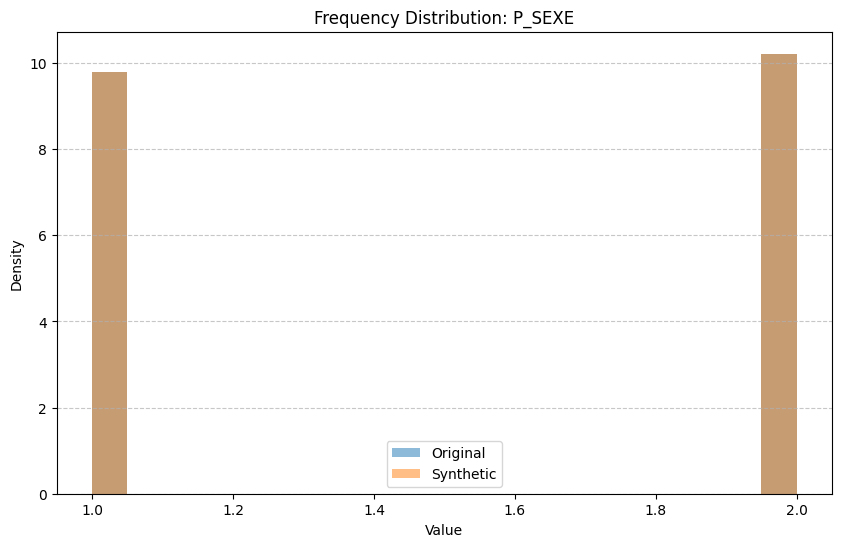

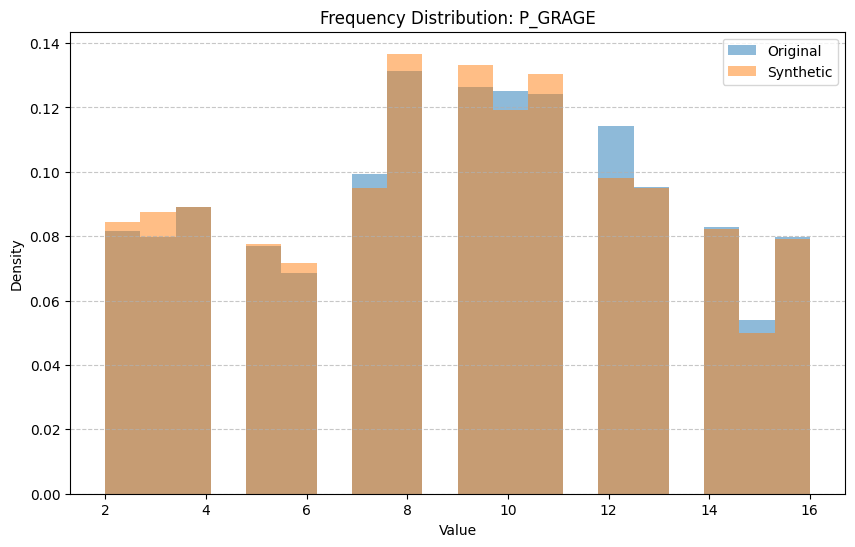

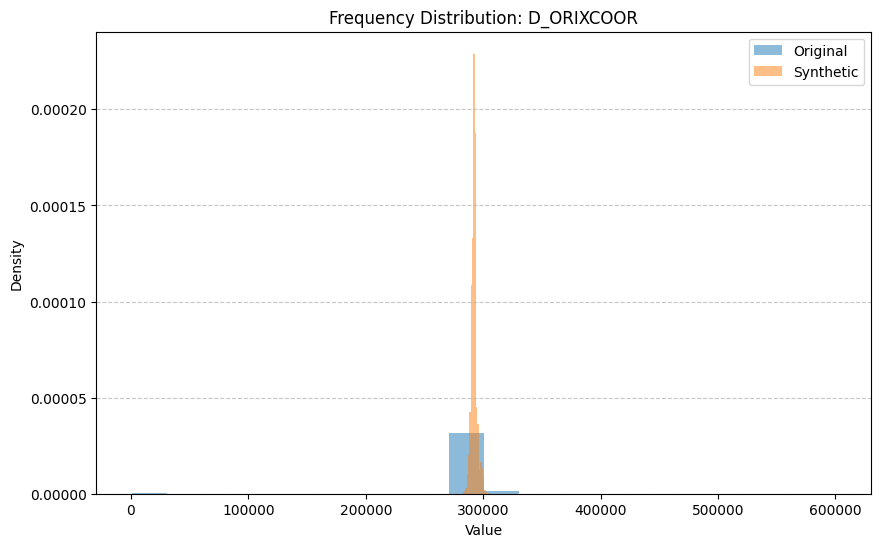

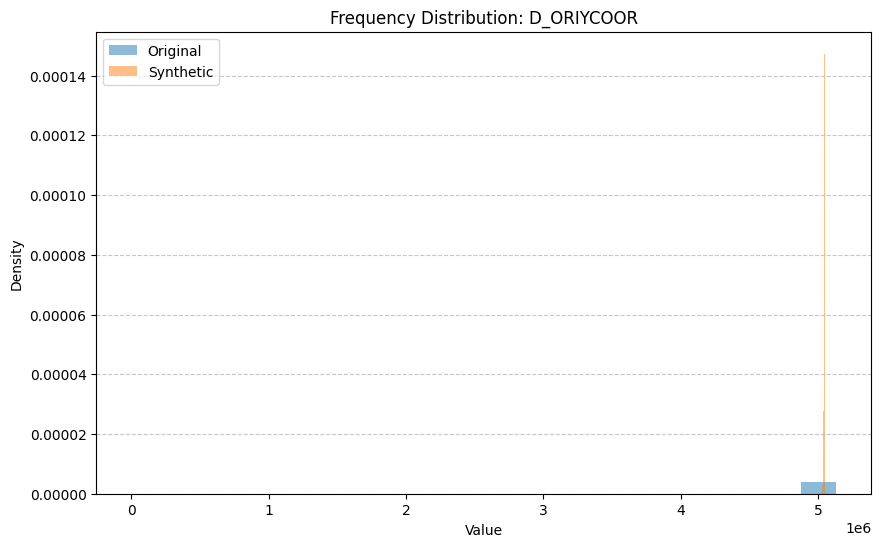

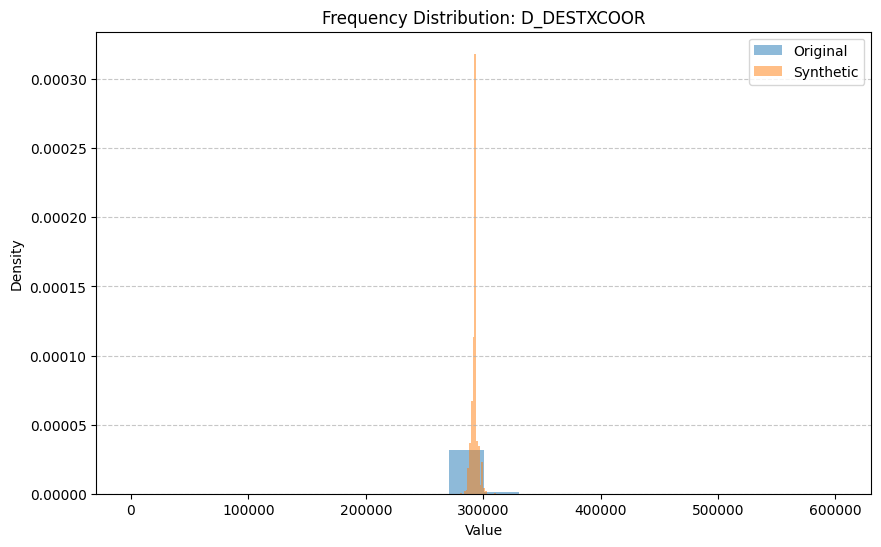

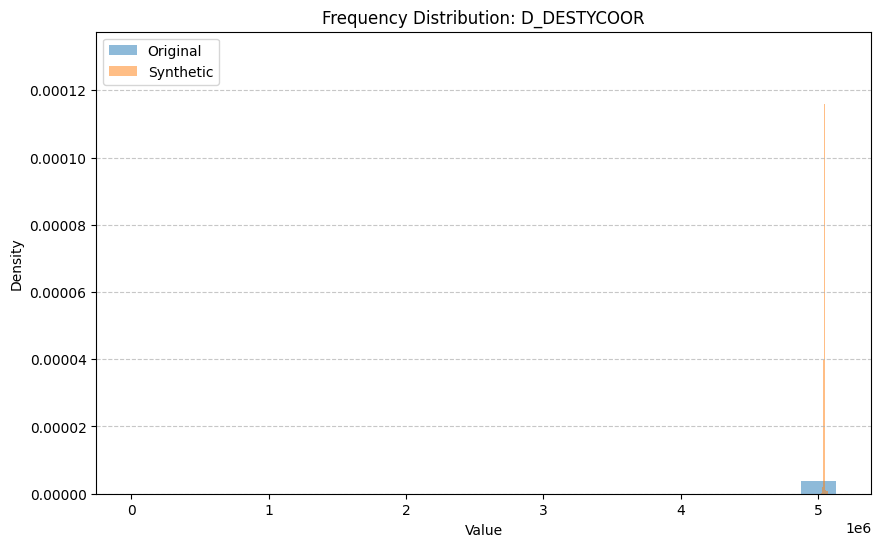

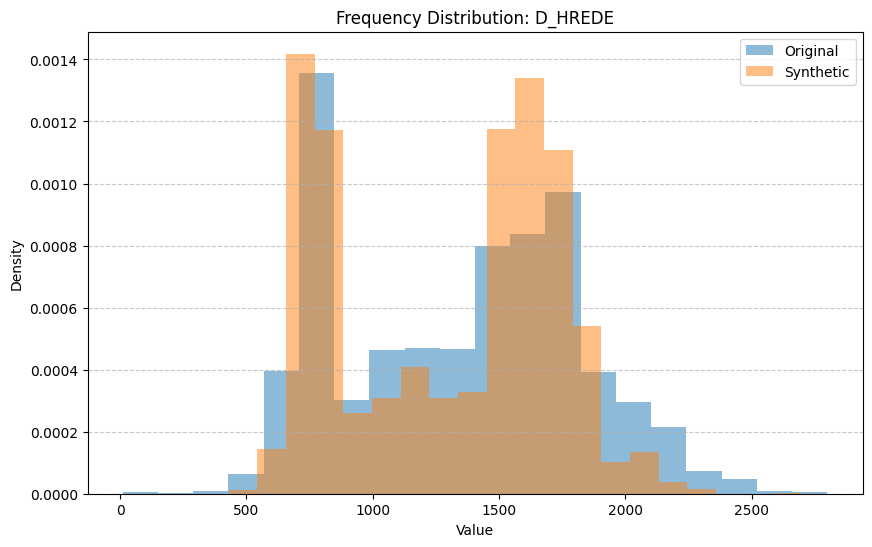

In [23]:
# Cell 7: Visualize Enhanced Distributions
def plot_frequency_comparison(original, synthetic, column_name):
    """
    Plot histograms to compare frequency distributions of original and synthetic data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(original, bins=20, alpha=0.5, label='Original', density=True)
    plt.hist(synthetic, bins=20, alpha=0.5, label='Synthetic', density=True)
    plt.title(f'Frequency Distribution: {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualize P_SEXE
plot_frequency_comparison(data['P_SEXE'], synthetic_data['P_SEXE'], 'P_SEXE')

# Visualize P_GRAGE
plot_frequency_comparison(data['P_GRAGE'], synthetic_data['P_GRAGE'], 'P_GRAGE')

# Visualize D_ORIXCOOR
plot_frequency_comparison(data['D_ORIXCOOR'], synthetic_data['D_ORIXCOOR'], 'D_ORIXCOOR')

for i in synthetic_data.columns[3:]: 
    plot_frequency_comparison(data[i], synthetic_data[i], i)



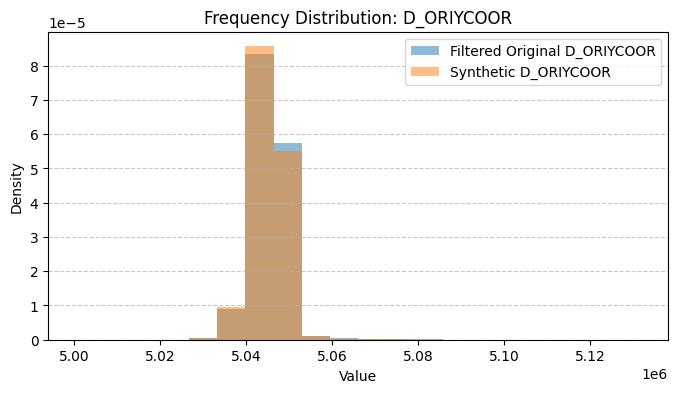

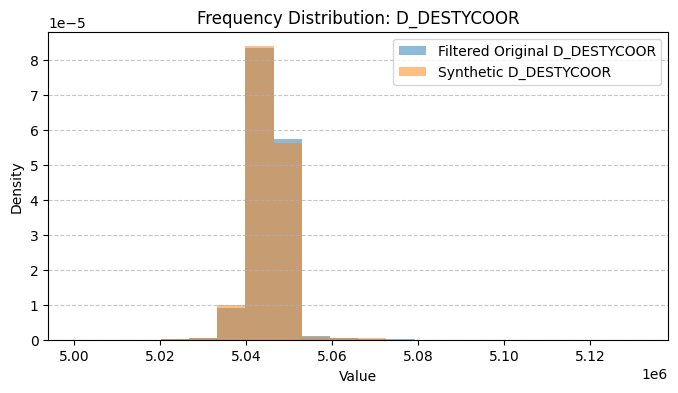

In [37]:
# Cell 7-1a: Visualize D_ORIYCOOR and D_DESTYCOOR
def plot_frequency_comparison_y(original, synthetic, column_name, filter_range=(4e6, 6e6)):
    """
    Plot histograms to compare frequency distributions of original and synthetic data for Y-coordinates.
    
    Parameters:
    - original: Original data series.
    - synthetic: Synthetic data series.
    - column_name: Name of the column being visualized.
    - filter_range: Tuple (min, max) to filter original data.
    """
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    
    # Filter the original data
    filtered_original = original[(original > filter_range[0]) & (original < filter_range[1])]
    
    # Create the histogram for the filtered original data
    n, bins, _ = ax.hist(
        filtered_original, bins=20, density=True, alpha=0.5, label=f'Filtered Original {column_name}'
    )
    
    # Use the same bins for the synthetic data histogram
    ax.hist(synthetic, density=True, bins=bins, alpha=0.5, label=f'Synthetic {column_name}')
    
    # Plot formatting
    plt.title(f'Frequency Distribution: {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(f"{column_name}_comparison_y.png")
    plt.show()

# Visualize for D_ORIYCOOR and D_DESTYCOOR
columns_y = ['D_ORIYCOOR', 'D_DESTYCOOR']
for column in columns_y:
    plot_frequency_comparison_y(data[column], synthetic_data[column], column)


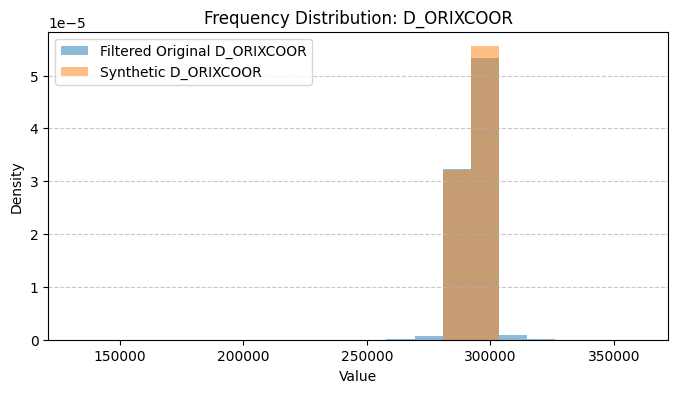

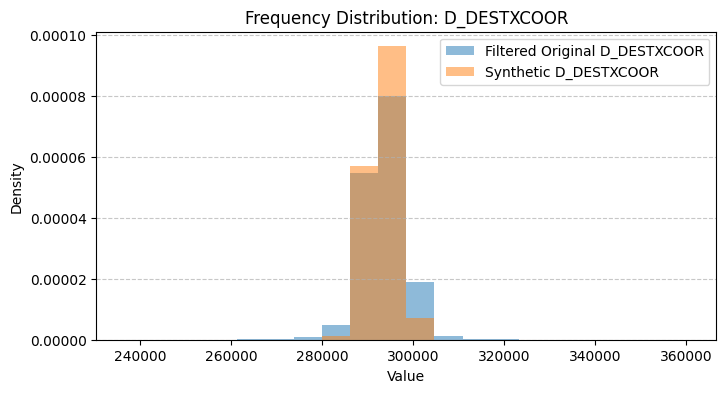

In [38]:
# Cell 7-1b: Visualize D_ORIXCOOR and D_DESTXCOOR
def plot_frequency_comparison_x(original, synthetic, column_name, filter_factor=0.2):
    """
    Plot histograms to compare frequency distributions of original and synthetic data for X-coordinates.
    
    Parameters:
    - original: Original data series.
    - synthetic: Synthetic data series.
    - column_name: Name of the column being visualized.
    - filter_factor: Determines the filtering range as a proportion of the data range.
    """
    plt.figure(figsize=(8, 4))
    ax = plt.gca()
    
    # Determine the filtering range dynamically
    col_min, col_max = original.min(), original.max()
    range_min = col_min + filter_factor * (col_max - col_min)
    range_max = col_max - filter_factor * (col_max - col_min)
    
    # Filter the original data
    filtered_original = original[(original > range_min) & (original < range_max)]
    
    # Create the histogram for the filtered original data
    n, bins, _ = ax.hist(
        filtered_original, bins=20, density=True, alpha=0.5, label=f'Filtered Original {column_name}'
    )
    
    # Use the same bins for the synthetic data histogram
    ax.hist(synthetic, density=True, bins=bins, alpha=0.5, label=f'Synthetic {column_name}')
    
    # Plot formatting
    plt.title(f'Frequency Distribution: {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(f"{column_name}_comparison_x.png")
    plt.show()

# Visualize for D_ORIXCOOR and D_DESTXCOOR
columns_x = ['D_ORIXCOOR', 'D_DESTXCOOR']
for column in columns_x:
    plot_frequency_comparison_x(data[column], synthetic_data[column], column)


In [43]:
# Cell 8: Compare Enhanced Frequency Distributions in Words for All Columns
def compare_frequencies_in_words(original, synthetic, column_name):
    """
    Compare frequency distributions of original and synthetic data in words.
    """
    print(f"\nFrequency comparison for {column_name}:")
    print("Original Data Distribution:")
    print(original.value_counts(normalize=True).sort_index())
    print("\nSynthetic Data Distribution:")
    print(synthetic.value_counts(normalize=True).sort_index())


for col in data.columns:
    print(col)
    print('-'*100)
    compare_frequencies_in_words(data[col], synthetic_data[col], col)
    print("\nSummary Statistics for D_ORIXCOOR:")
    print("Original Data Summary:")
    print(data[col].describe())
    print("\nSynthetic Data Summary:")
    print(synthetic_data[col].describe())
    print('-'*100)



P_SEXE
----------------------------------------------------------------------------------------------------

Frequency comparison for P_SEXE:
Original Data Distribution:
P_SEXE
1    0.489363
2    0.510637
Name: proportion, dtype: float64

Synthetic Data Distribution:
P_SEXE
1    0.489117
2    0.510883
Name: proportion, dtype: float64

Summary Statistics for D_ORIXCOOR:
Original Data Summary:
count    12175.000000
mean         1.510637
std          0.499907
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: P_SEXE, dtype: float64

Synthetic Data Summary:
count    2435.000000
mean        1.510883
std         0.499984
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: P_SEXE, dtype: float64
----------------------------------------------------------------------------------------------------
P_GRAGE
---------------------------------------------------------------------

In [44]:
# Cell 10: Save Synthetic Data to CSV
output_csv_path = 'synthetic_data.csv'  # Specify the output filename
synthetic_data.to_csv(output_csv_path, index=False)

print(f"Synthetic data saved successfully as '{output_csv_path}'.")

Synthetic data saved successfully as 'synthetic_data.csv'.


In [56]:
# GAN training loop
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)

    # Sample real data
    real_batch = real_data_scaled[np.random.randint(0, real_data_scaled.shape[0], batch_size)]

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_batch, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    for _ in range(2):  # Train generator multiple times
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: D Loss = {d_loss[0]}, D Acc = {d_loss[1] * 100}%, G Loss = {g_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 0: D Loss = 0.7138909101486206, D Acc = 34.89583134651184%, G Loss = 0.7037989497184753
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/

In [60]:
# Save synthetic data into the dataset
generated_columns = [f'Synthetic_GAN_{col}' for col in coordinate_columns]
all_columns = ['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR', 'D_DESTYCOOR', 'D_HREDE']

# Save the combined dataset (original + synthetic data)
data.to_csv("synthetic_dataset.csv", index=False)
print("Synthetic dataset saved to 'synthetic_dataset.csv'.")


Synthetic dataset saved to 'synthetic_dataset.csv'.


In [63]:
print(data.columns)


Index(['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR',
       'D_DESTYCOOR', 'D_HREDE'],
      dtype='object')


In [65]:
# Generate synthetic data for the entire dataset
noise = np.random.normal(0, 1, (data.shape[0], latent_dim))  # Match the number of rows in 'data'
synthetic_coordinates = scaler.inverse_transform(generator.predict(noise))  # Generate synthetic data

# Add synthetic columns to the data DataFrame
for i, col in enumerate(coordinate_columns):
    data[f'Synthetic_GAN_{col}'] = synthetic_coordinates[:, i]

print("Synthetic columns successfully added to the dataset.")


381/381 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
Synthetic columns successfully added to the dataset.


In [66]:
print(data.head())  # Check the first few rows
print(data.columns)  # Ensure the synthetic columns are present


   P_SEXE  P_GRAGE  D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR  D_HREDE  \
0       1       14      291500     5045500       291500      5045500      930   
1       1       14      291500     5045500       291500      5045500     1030   
2       1       14      291500     5045500       292500      5045500     1200   
3       1       14      292500     5045500       291500      5045500     1300   
4       1       14      291500     5045500       291500      5045500     1400   

   Synthetic_GAN_D_ORIXCOOR  Synthetic_GAN_D_ORIYCOOR  \
0             183467.500000                 5131456.5   
1             180029.218750                 5131492.5   
2             221786.531250                 5131499.0   
3             170815.515625                 5131460.0   
4             172141.500000                 5131451.0   

   Synthetic_GAN_D_DESTXCOOR  Synthetic_GAN_D_DESTYCOOR  
0                600482.5625                 567.435852  
1                600497.7500                 520.79657

In [70]:
# Compare statistics between actual and synthetic data
stats_comparison = pd.DataFrame({
    "Original Mean": data[coordinate_columns].mean(),
    "Synthetic Mean": data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].mean(),
    "Original Std": data[coordinate_columns].std(),
    "Synthetic Std": data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].std(),
    "Original Min": data[coordinate_columns].min(),
    "Synthetic Min": data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].min(),
    "Original Max": data[coordinate_columns].max(),
    "Synthetic Max": data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].max(),
})

# Display the statistics comparison
print("Statistics Comparison:")
print(stats_comparison)

# Save the statistics comparison to a CSV file
stats_comparison.to_csv("stats_comparison.csv", index=True)
print("Statistics comparison saved to 'stats_comparison.csv'.")


Statistics Comparison:
                           Original Mean  Synthetic Mean   Original Std  \
D_DESTXCOOR                 2.916831e+05             NaN   18152.704835   
D_DESTYCOOR                 5.027295e+06             NaN  299303.924029   
D_ORIXCOOR                  2.913353e+05             NaN   20551.155512   
D_ORIYCOOR                  5.021913e+06             NaN  341374.907354   
Synthetic_GAN_D_DESTXCOOR            NaN    6.004581e+05            NaN   
Synthetic_GAN_D_DESTYCOOR            NaN    7.540929e+02            NaN   
Synthetic_GAN_D_ORIXCOOR             NaN    1.884883e+05            NaN   
Synthetic_GAN_D_ORIYCOOR             NaN    5.131356e+06            NaN   

                           Synthetic Std  Original Min  Synthetic Min  \
D_DESTXCOOR                          NaN         500.0            NaN   
D_DESTYCOOR                          NaN         500.0            NaN   
D_ORIXCOOR                           NaN         500.0            NaN   
D_ORIYCOO

In [71]:
# Word-based summary of the comparison
word_report = f"""
Word Report:
-------------
Statistics Comparison Between Original and Synthetic Data:

Original Means:
{data[coordinate_columns].mean()}

Synthetic Means:
{data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].mean()}

Original Standard Deviations:
{data[coordinate_columns].std()}

Synthetic Standard Deviations:
{data[[f'Synthetic_GAN_{col}' for col in coordinate_columns]].std()}
"""

# Save the word-based summary to a text file
with open("word_report.txt", "w") as report_file:
    report_file.write(word_report)

print("Word-based report saved to 'word_report.txt'.")


Word-based report saved to 'word_report.txt'.


In [84]:
print(f"Original Data ({original_col}):")
print(data[original_col].describe())

print(f"Synthetic Data ({synthetic_col}):")
print(data[synthetic_col].describe())


Original Data (D_DESTYCOOR):
count    1.217500e+04
mean     5.027295e+06
std      2.993039e+05
min      5.000000e+02
25%      5.043500e+06
50%      5.045500e+06
75%      5.046500e+06
max      5.131500e+06
Name: D_DESTYCOOR, dtype: float64
Synthetic Data (Synthetic_GAN_D_DESTYCOOR):
count    12175.000000
mean       754.092896
std        703.948975
min        500.000000
25%        510.857025
50%        549.544678
75%        697.414185
max      19288.753906
Name: Synthetic_GAN_D_DESTYCOOR, dtype: float64


In [89]:
print(data.columns)


Index(['P_SEXE', 'P_GRAGE', 'D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR',
       'D_DESTYCOOR', 'D_HREDE', 'Synthetic_GAN_D_ORIXCOOR',
       'Synthetic_GAN_D_ORIYCOOR', 'Synthetic_GAN_D_DESTXCOOR',
       'Synthetic_GAN_D_DESTYCOOR'],
      dtype='object')


In [86]:
# Check if columns exist and have valid data
for col in original_columns + synthetic_columns:
    if col in data.columns:
        print(f"Column {col}:")
        print(data[col].describe())
    else:
        print(f"Column {col} does not exist in the data.")


Column D_ORIXCOOR:
count     12175.000000
mean     291335.318275
std       20551.155512
min         500.000000
25%      290500.000000
50%      292500.000000
75%      293500.000000
max      600500.000000
Name: D_ORIXCOOR, dtype: float64
Column D_ORIYCOOR:
count    1.217500e+04
mean     5.021913e+06
std      3.413749e+05
min      5.000000e+02
25%      5.043500e+06
50%      5.045500e+06
75%      5.046500e+06
max      5.131500e+06
Name: D_ORIYCOOR, dtype: float64
Column D_DESTXCOOR:
count     12175.000000
mean     291683.080082
std       18152.704835
min         500.000000
25%      290500.000000
50%      292500.000000
75%      293500.000000
max      600500.000000
Name: D_DESTXCOOR, dtype: float64
Column D_DESTYCOOR:
count    1.217500e+04
mean     5.027295e+06
std      2.993039e+05
min      5.000000e+02
25%      5.043500e+06
50%      5.045500e+06
75%      5.046500e+06
max      5.131500e+06
Name: D_DESTYCOOR, dtype: float64
Column Synthetic_GAN_D_ORIXCOOR:
count     12175.000000
mean     188

In [73]:
# Save the dataset with synthetic data
data.to_csv("synthetic_dataset_with_all_columns.csv", index=False)
print("Synthetic dataset saved to 'synthetic_dataset_with_all_columns.csv'.")


Synthetic dataset saved to 'synthetic_dataset_with_all_columns.csv'.
